In [2]:
from force_field_2 import MolDynMDStretch

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Setup

In [73]:
atom_types = [1, 1]
atom_xyz = np.array([[-37e-12, 0, 0], [37e-12, 0, 0]])
atom_velocities = np.array([[0.01e-12, 0, 0], [-0.01e-12, 0, 0]])
atom_bonds = np.array([
    [[0, 0], [0.74e-12, -100]],
    [[0.74e-12, -100], [0, 0]]
])
atom_masses = np.array([1.634e-27, 1.634e-27])  # The masses of H atoms in kg

mol_dyn = MolDynMDStretch(atom_types=atom_types,
                          atom_masses=atom_masses,
                          atom_velocities=atom_velocities,
                          atom_positions=atom_xyz,
                          atom_bonds=atom_bonds,
                          dt_s=0.01e-15,
                          grad_h_m=0.1e-15)

for _ in range(5000):
    mol_dyn.timestep()

# Extract the x component of all positions and all velocities for plotting.

In [74]:
x_positions_1 = []
x_velocities_1 = []

x_positions_2 = []
x_velocities_2 = []

for step in mol_dyn.trajectory:
    positions = step["atom_positions"]
    velocities = step["atom_velocities"]
    x_positions_1.append(positions[0, 0])
    x_positions_2.append(positions[1, 0])
    x_velocities_1.append(velocities[0, 0])
    x_velocities_2.append(velocities[1, 0])
    
x_positions_1 = np.array(x_positions_1)
x_positions_2 = np.array(x_positions_2)
x_velocities_1 = np.array(x_velocities_1) 
x_velocities_2 = np.array(x_velocities_2)

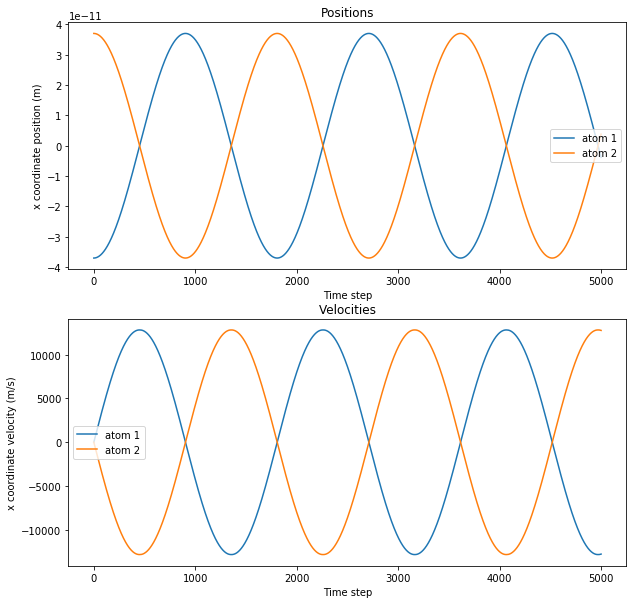

In [75]:
timesteps = np.arange(len(x_positions_1))

_, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

axs[0].set_title("Positions")
axs[0].set_xlabel("Time step")
axs[0].set_ylabel("x coordinate position (m)")
axs[0].plot(timesteps, x_positions_1, label="atom 1")
axs[0].plot(timesteps, x_positions_2, label="atom 2")
axs[0].legend(loc="best")

axs[1].set_title("Velocities")
axs[1].set_xlabel("Time step")
axs[1].set_ylabel("x coordinate velocity (m/s)")
axs[1].plot(timesteps, x_velocities_1, label="atom 1")
axs[1].plot(timesteps, x_velocities_2, label="atom 2")
axs[1].legend(loc="best")

In [47]:
x_positions_1

array([-3.70000000e-11, -3.70000045e-11, -3.70000135e-11, ...,
       -9.06230101e+01, -9.06265147e+01, -9.06300194e+01])